<a href="https://colab.research.google.com/github/saicharan394/bmlexternal/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/Mall_customers.csv") # importing the dataset

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200, 5)


In [ ]:
# checking for NULL data in the dataset
data.isnull().any().any()

False

In [ ]:
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
print(x.shape)

(200, 2)


Before we apply the DBSCAN model,
first, we need to obtain its two
parameters eps and minpoints

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

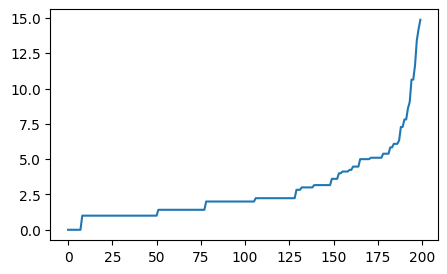

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked
our Eps as 8.


We now have our two parameters as:
MinPoints = 4
Eps = 8

Implementing the DBSCAN model

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model

[ 2  0  1  0  2  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
 -1  0  2 -1  2  0  1  0 -1  0 -1  0 -1  0  3  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  5  4  5  4
  5  4  5  4  5  4  5  4  5  4  5  4 -1  4  5  4 -1 -1  6 -1  6  4  6 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


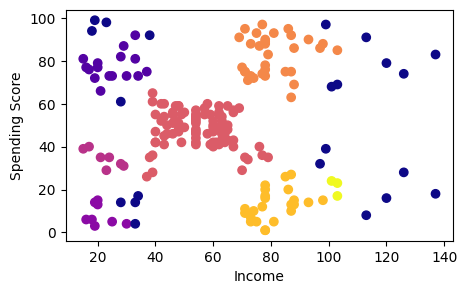

In [ ]:
labels = dbscan.labels_ # getting the labels
print(labels)
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot